In [ ]:
!pip install cupy-cuda11x  # Replace '12x' with the appropriate version number

import pandas as pd
%pip install pm4py
import pm4py
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from pm4py.objects.log.importer.xes import importer as xes_importer

In [ ]:
# Load Event Log (Read XES file and convert to DataFrame)
### pm4py uses dataframe as the standard format for event logs

drive.mount('/content/drive', force_remount=True)
log = pm4py.read_xes('/content/drive/MyDrive/BIS/Project/Files/Sepsis Cases - Event Log.xes/Sepsis Cases - Event Log.xes')
eventlog_df = pm4py.convert_to_dataframe(log)

# Preparing data // These steps are essential for ensuring that the DataFrame is in the correct format for further analysis or processing.

#eventlog_df['@@case_index'] = eventlog_df['@@case_index'].apply(str)  #converts all values in the @@case_index column to strings. (CaseID for PM4PY should be string. If in our eventlog, it is number, we should convert it to text.)
#eventlog_df.rename(columns={'@@case_index': 'case:concept:name', 'case:concept:name': 'Case Name'}, inplace=True)  #renames the column @@case_index to case:concept:name and then immediately renames case:concept:name to Case Name.
eventlog_df['time:timestamp']= pd.to_datetime(eventlog_df['time:timestamp'])  #converts the time:timestamp column to datetime format.
eventlog_df['Leucocytes'] = pd.to_numeric(eventlog_df['Leucocytes'], errors='coerce') #This line converts the Leucocytes column to numeric values, turning 'nan' strings to NaN values.
eventlog_df['LacticAcid'] = pd.to_numeric(eventlog_df['LacticAcid'], errors='coerce') #This line converts the Leucocytes column to numeric values, turning 'nan' strings to NaN values.

# Sort by case ID and timestamp
eventlog_df = eventlog_df.sort_values(by=['case:concept:name', 'time:timestamp'])

eventlog_df

Mounted at /content/drive


parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
0,True,A,True,True,True,True,True,True,True,ER Registration,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,NaN,146.0,NaN
10229,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,8.3,NaN,NaN
10230,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,7.7,NaN,NaN
10231,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,NaN,96.0,NaN


In [ ]:
# Let's study the event log

#"IV" stands for intravenous. This term refers to the administration of substances directly into a vein.
#ER=Emergency Room

num_events = len(eventlog_df)
num_cases = len(eventlog_df['case:concept:name'].unique())
print("Nmber of events: {}\nNumber of cases: {}".format(num_events, num_cases))

start_activities = pm4py.get_start_activities(eventlog_df)
end_activities = pm4py.get_end_activities(eventlog_df)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))



Nmber of events: 15214
Number of cases: 1050
Start activities: {'ER Registration': 995, 'ER Sepsis Triage': 7, 'CRP': 10, 'Leucocytes': 18, 'IV Liquid': 14, 'ER Triage': 6}
End activities: {'Release A': 393, 'IV Antibiotics': 87, 'Return ER': 291, 'LacticAcid': 24, 'Admission NC': 14, 'CRP': 41, 'ER Sepsis Triage': 49, 'Leucocytes': 44, 'IV Liquid': 12, 'Release B': 55, 'Release E': 5, 'Release C': 19, 'Release D': 14, 'ER Triage': 2}


In [ ]:
#Filter the eventlog_df DataFrame to retain only the cases that start and end with one of the specified activities. This ensures that only cases with these specific start and end activities are included in filtered_log.
filtered_log = pm4py.filter_end_activities(eventlog_df, ['Release A', 'Release B', 'Release C', 'Release D', 'Release E', 'Return ER'])

#Filter above filtered_log to retain only the cases that start with one of the specified activities. This ensures that only cases with these specific start activities are included in the final filtered_log.
filtered_log = pm4py.filter_start_activities(filtered_log, ['ER Registration', 'ER Sepsis Triage', 'ER Triage'])

print("Given {} total cases in the log we have {} cases that comply with constraints for complete cases".format(num_cases,len(filtered_log['case:concept:name'].unique())))
filtered_log

Given 743 total cases in the log we have 743 cases that comply with constraints for complete cases


,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
0,True,A,True,True,True,True,True,True,True,ER Registration,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,NaN,146.0,NaN
10229,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,8.3,NaN,NaN
10230,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,7.7,NaN,NaN
10231,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,complete,NaN,NaN,NaN,NaN,ZZ,NaN,96.0,NaN


In [ ]:
# Let's study the filtered log

num_events = len(filtered_log)
num_cases = len(filtered_log['case:concept:name'].unique())
print("Nmber of events after filtering: {}\nNumber of cases after filtering: {}".format(num_events, num_cases))

start_activities = pm4py.get_start_activities(filtered_log)
end_activities = pm4py.get_end_activities(filtered_log)
print("Start activities after filtering: {}\nEnd activities after filtering: {}".format(start_activities, end_activities))

Nmber of events after filtering: 12604
Number of cases after filtering: 743
Start activities after filtering: {'ER Registration': 734, 'ER Sepsis Triage': 5, 'ER Triage': 4}
End activities after filtering: {'Release A': 377, 'Return ER': 282, 'Release B': 50, 'Release E': 5, 'Release C': 16, 'Release D': 13}


In [ ]:
# Calculate the cumulativetime time for each event per case

# Create a pivot table of the start (minimum) and end (maximum) timestamps associated with each case
case_starts_ends = filtered_log.pivot_table(index='case:concept:name', aggfunc={'time:timestamp': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['case:concept:name', 'caseend','casestart',]

# Merge with the main event log data so that for each row we have the start and end times.
filtered_log = filtered_log.merge(case_starts_ends, on='case:concept:name', suffixes=('', '_y'))

# Calculate the relative time by subtracting the process start time from the event timestamp
filtered_log['cumulativetime'] = filtered_log['time:timestamp'] - filtered_log['casestart']
filtered_log['Duration'] = filtered_log['caseend'] - filtered_log['casestart']

# Convert relative times to more friendly measures
## seconds
filtered_log['cumulativetime_s'] = filtered_log['cumulativetime'].dt.seconds + 86400*filtered_log['cumulativetime'].dt.days
## hours
filtered_log['cumulativetime_h'] = filtered_log['cumulativetime'].dt.seconds/3600 + 86400*filtered_log['cumulativetime'].dt.days
## days
filtered_log['cumulativedays'] = filtered_log['cumulativetime'].dt.days
filtered_log

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,LacticAcid,caseend,casestart,cumulativetime,cumulativetime_s,cumulativetime_h,cumulativedays,caseend_y,casestart_y,Duration
0,True,A,True,True,True,True,True,True,True,ER Registration,...,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:00:00,0,0.000000,0,2014-11-02 15:15:00,2014-10-22 11:15:41,11 days 03:59:19
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:11:19,679,0.188611,0,2014-11-02 15:15:00,2014-10-22 11:15:41,11 days 03:59:19
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:11:19,679,0.188611,0,2014-11-02 15:15:00,2014-10-22 11:15:41,11 days 03:59:19
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,2.2,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:11:19,679,0.188611,0,2014-11-02 15:15:00,2014-10-22 11:15:41,11 days 03:59:19
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:17:56,1076,0.298889,0,2014-11-02 15:15:00,2014-10-22 11:15:41,11 days 03:59:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12599,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,1 days 14:25:30,138330,86414.425000,1,2014-11-17 18:00:00,2014-11-12 16:34:30,5 days 01:25:30
12600,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,1 days 14:25:30,138330,86414.425000,1,2014-11-17 18:00:00,2014-11-12 16:34:30,5 days 01:25:30
12601,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,3 days 14:25:30,311130,259214.425000,3,2014-11-17 18:00:00,2014-11-12 16:34:30,5 days 01:25:30
12602,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,3 days 14:25:30,311130,259214.425000,3,2014-11-17 18:00:00,2014-11-12 16:34:30,5 days 01:25:30


In [ ]:
# Calculate the duration of each case  => and sort them
case_durations = filtered_log.groupby('case:concept:name').agg(\
Events=('case:concept:name', 'count'),\
# Multiple aggregations of the same column using pandas ... => Python LAmbda is a variable which can be updated during the calculation
FirstOccurence=('time:timestamp', lambda x: x.min()),
LastOccurence=('time:timestamp', lambda x: x.max()),
Duration=('time:timestamp', lambda x: x.max() - x.min()),
Case_name=('case:concept:name', 'first'),
)

# Merge the calculated durations back into the filtered_log
#filtered_log = filtered_log.merge(case_durations[['case:concept:name', 'Duration']], on='case:concept:name', how='left')

sorted_cases = case_durations.sort_values(by='Duration', ascending=True)
sorted_cases

,Events,FirstOccurence,LastOccurence,Duration,Case_name
case:concept:name,,,,,
FQ,8,2014-03-08 08:40:34,2014-03-08 11:55:00,0 days 03:14:26,FQ
PBA,11,2014-04-27 15:01:49,2014-04-27 22:55:00,0 days 07:53:11,PBA
TR,8,2014-04-02 08:03:30,2014-04-02 16:15:00,0 days 08:11:30,TR
QFA,8,2014-01-16 16:31:27,2014-01-17 05:50:00,0 days 13:18:33,QFA
CN,11,2014-01-01 17:06:57,2014-01-02 09:00:00,0 days 15:53:03,CN
...,...,...,...,...,...
UBA,15,2014-05-08 11:58:15,2015-05-30 11:14:55,386 days 23:16:40,UBA
LS,15,2013-11-18 17:24:56,2014-12-20 16:39:26,396 days 23:14:30,LS
ZS,14,2013-11-14 11:58:51,2014-12-18 10:08:54,398 days 22:10:03,ZS


In [ ]:
# Filter cases where Duration is greater than 28 days
long_cases = case_durations[case_durations['Duration'] > pd.Timedelta(days=28)]

sorted_cases = long_cases.sort_values(by='Duration', ascending=True)
sorted_cases

,Events,FirstOccurence,LastOccurence,Duration,Case_name
case:concept:name,,,,,
RLA,22,2014-05-27 09:44:26,2014-06-24 11:42:16,28 days 01:57:50,RLA
OX,14,2014-04-29 10:54:06,2014-05-27 17:09:10,28 days 06:15:04,OX
CY,33,2014-06-04 20:02:57,2014-07-03 09:00:00,28 days 12:57:03,CY
TI,21,2015-01-29 14:34:58,2015-02-27 10:30:00,28 days 19:55:02,TI
JAA,23,2014-03-02 06:35:09,2014-03-31 09:30:00,29 days 02:54:51,JAA
...,...,...,...,...,...
UBA,15,2014-05-08 11:58:15,2015-05-30 11:14:55,386 days 23:16:40,UBA
LS,15,2013-11-18 17:24:56,2014-12-20 16:39:26,396 days 23:14:30,LS
ZS,14,2013-11-14 11:58:51,2014-12-18 10:08:54,398 days 22:10:03,ZS


In [ ]:
# Filter cases where Duration is smaller than 28 days
removed_long_cases = case_durations[case_durations['Duration'] < pd.Timedelta(days=28)]

sorted_cases = removed_long_cases.sort_values(by='Duration', ascending=True)
sorted_cases

,Events,FirstOccurence,LastOccurence,Duration,Case_name
case:concept:name,,,,,
FQ,8,2014-03-08 08:40:34,2014-03-08 11:55:00,0 days 03:14:26,FQ
PBA,11,2014-04-27 15:01:49,2014-04-27 22:55:00,0 days 07:53:11,PBA
TR,8,2014-04-02 08:03:30,2014-04-02 16:15:00,0 days 08:11:30,TR
QFA,8,2014-01-16 16:31:27,2014-01-17 05:50:00,0 days 13:18:33,QFA
CN,11,2014-01-01 17:06:57,2014-01-02 09:00:00,0 days 15:53:03,CN
...,...,...,...,...,...
SCA,17,2014-01-27 20:51:17,2014-02-23 10:41:36,26 days 13:50:19,SCA
FE,17,2015-01-24 16:45:54,2015-02-20 10:34:07,26 days 17:48:13,FE
KFA,15,2014-03-06 14:41:30,2014-04-02 15:07:59,27 days 00:26:29,KFA


In [ ]:
# Segment of the log where Duration is smaller than 28 days

segment_removed_long_cases = filtered_log[filtered_log['case:concept:name'].isin(removed_long_cases['Case_name'])]
segment_removed_long_cases

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,case:concept:name,Leucocytes,CRP,LacticAcid,caseend,casestart,cumulativetime,cumulativetime_s,cumulativetime_h,cumulativedays
0,True,A,True,True,True,True,True,True,True,ER Registration,...,A,NaN,NaN,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:00:00,0,0.000000,0
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,A,9.6,NaN,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:11:19,679,0.188611,0
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,A,NaN,21.0,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:11:19,679,0.188611,0
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,A,NaN,NaN,2.2,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:11:19,679,0.188611,0
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,A,NaN,NaN,NaN,2014-11-02 15:15:00,2014-10-22 11:15:41,0 days 00:17:56,1076,0.298889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12599,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,ZZ,NaN,146.0,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,1 days 14:25:30,138330,86414.425000,1
12600,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,ZZ,8.3,NaN,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,1 days 14:25:30,138330,86414.425000,1
12601,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,ZZ,7.7,NaN,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,3 days 14:25:30,311130,259214.425000,3
12602,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,ZZ,NaN,96.0,NaN,2014-11-17 18:00:00,2014-11-12 16:34:30,3 days 14:25:30,311130,259214.425000,3


In [ ]:
# Segment of the log where Duration is greater than 28 days

segment_long_cases = filtered_log[filtered_log['case:concept:name'].isin(long_cases['Case_name'])]
segment_long_cases

,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,concept:name,...,case:concept:name,Leucocytes,CRP,LacticAcid,caseend,casestart,cumulativetime,cumulativetime_s,cumulativetime_h,cumulativedays
50,True,A,True,False,True,False,False,True,False,ER Registration,...,AC,NaN,NaN,NaN,2014-12-02 18:47:17,2014-09-24 15:39:13,0 days 00:00:00,0,0.000000e+00,0
51,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,...,AC,NaN,NaN,NaN,2014-12-02 18:47:17,2014-09-24 15:39:13,0 days 00:13:27,807,2.241667e-01,0
52,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Sepsis Triage,...,AC,NaN,NaN,NaN,2014-12-02 18:47:17,2014-09-24 15:39:13,0 days 00:16:01,961,2.669444e-01,0
53,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,...,AC,8.8,NaN,NaN,2014-12-02 18:47:17,2014-09-24 15:39:13,0 days 00:24:47,1487,4.130556e-01,0
54,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,...,AC,NaN,NaN,1.5,2014-12-02 18:47:17,2014-09-24 15:39:13,0 days 00:24:47,1487,4.130556e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12527,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,...,ZS,NaN,17.0,NaN,2014-12-18 10:08:54,2013-11-14 11:58:51,0 days 02:00:09,7209,2.002500e+00,0
12528,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IV Antibiotics,...,ZS,NaN,NaN,NaN,2014-12-18 10:08:54,2013-11-14 11:58:51,0 days 02:43:41,9821,2.728056e+00,0
12529,NaN,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Admission NC,...,ZS,NaN,NaN,NaN,2014-12-18 10:08:54,2013-11-14 11:58:51,0 days 07:44:28,27868,7.741111e+00,0
12530,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Release A,...,ZS,NaN,NaN,NaN,2014-12-18 10:08:54,2013-11-14 11:58:51,1 days 22:01:09,165669,8.642202e+04,1


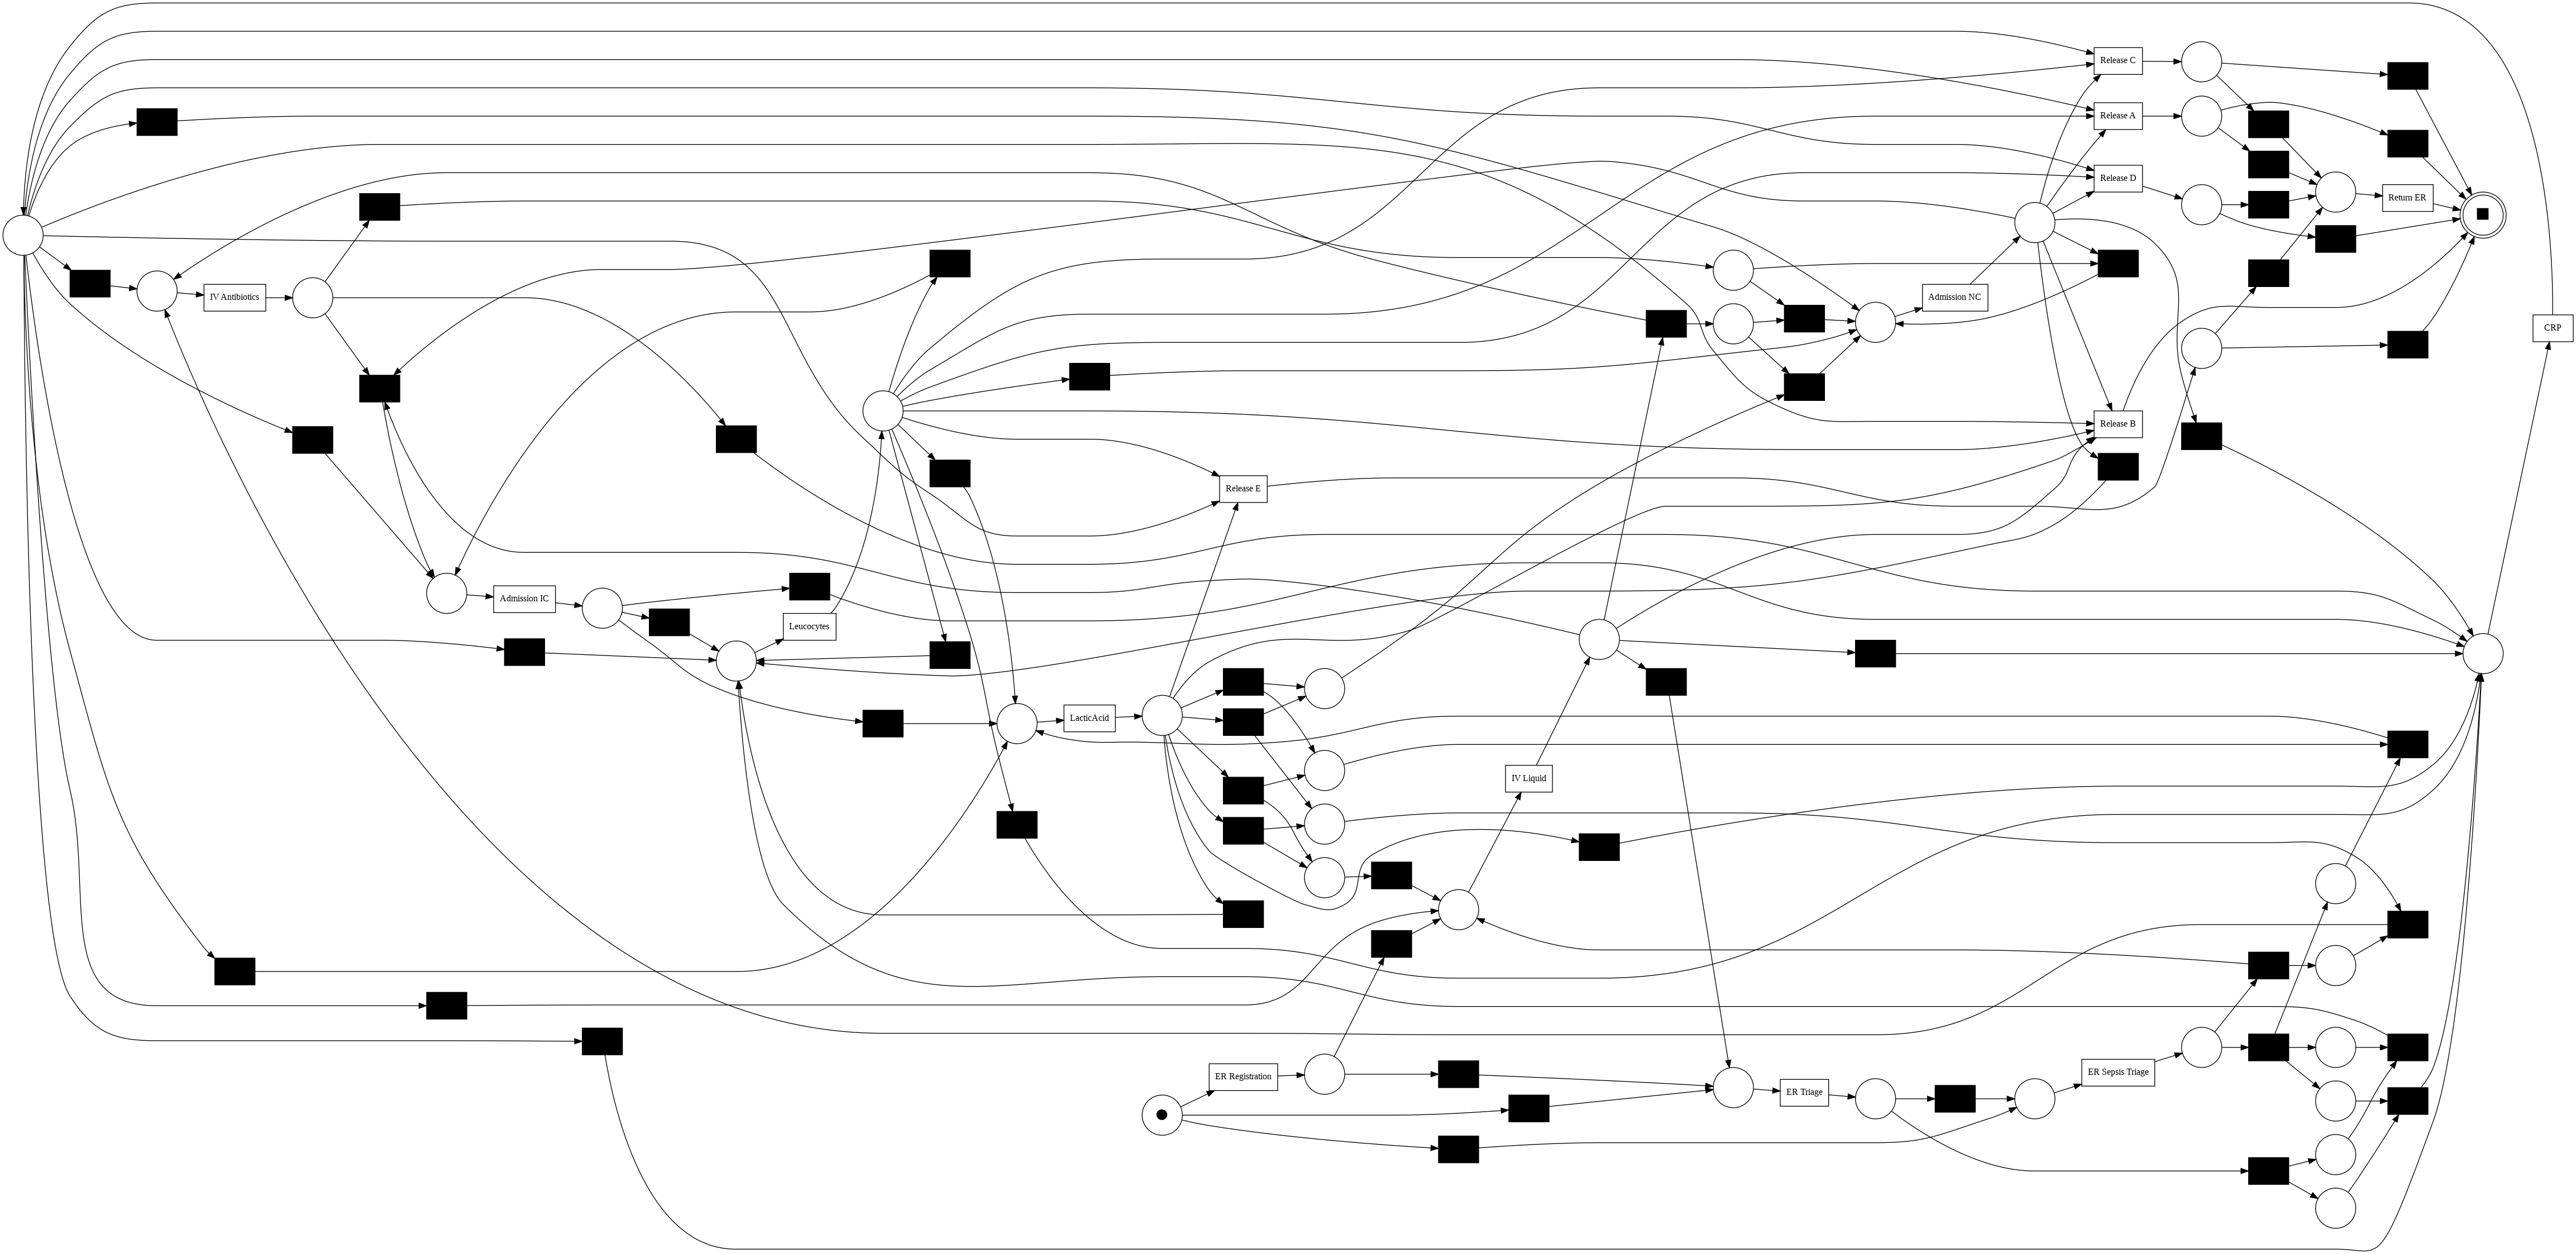

In [ ]:
# Discover the model with Heuristic Miner

#This line uses the Heuristic Miner algorithm to discover a Petri net from the event log filtered_log.
#net represents the discovered Petri net structure.
#im (initial marking) denotes the starting point of the process in the Petri net.
#fm (final marking) represents the ending point of the process in the Petri net.
#The dependency_threshold parameter, set to 0.9, determines the strength of the dependency required between activities for them to be considered connected. A higher value means stricter dependencies are required for connections to be included in the model.

net, im, fm = pm4py.discover_petri_net_heuristics(filtered_log, dependency_threshold=0.5)
pm4py.view_petri_net(net, im, fm, format='png')

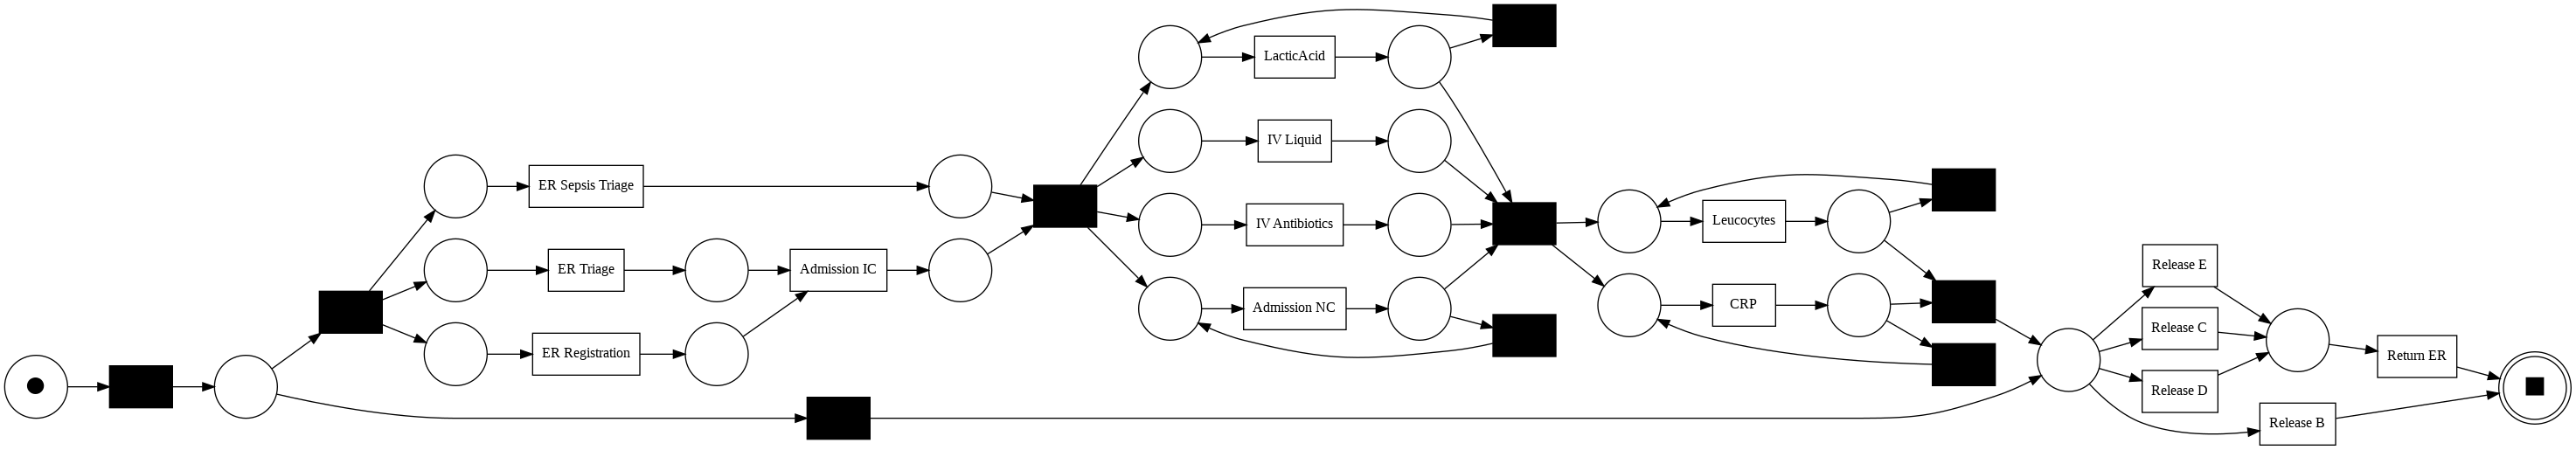

In [ ]:
# Discover the process model with Inductive Miner

net, im, fm = pm4py.discover_petri_net_inductive(filtered_log, noise_threshold= 0.9)
pm4py.view_petri_net(net, im, fm, format='png')

In [ ]:
# Conformance checking diagnostic =>fixed: having dataframe which provides caseID as well with "return_diagnostics_dataframe = True"

tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(filtered_log , net, im, fm, return_diagnostics_dataframe = True)
tbr_diagnostics

replaying log with TBR, completed traces ::   0%|          | 0/694 [00:00<?, ?it/s]

,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,A,False,0.815789,7,7,38,38
1,AAA,False,0.430769,7,9,15,13
2,ABA,False,0.750000,7,7,28,28
3,AC,False,0.631579,7,7,19,19
4,AD,False,0.854449,7,8,52,51
...,...,...,...,...,...,...,...
738,ZU,False,0.386905,7,9,14,12
739,ZV,False,0.611111,7,7,18,18
740,ZW,False,0.650000,7,7,20,20
741,ZX,False,0.386905,7,9,14,12


In [ ]:
#************************************************* Filter disfunctional cases in filtered_log********************************************

## Get the Case_ID of the cases with low fitness values(Disfunctional traces) => Filter based on CaseID
disfunctional_traces = tbr_diagnostics['case_id'][tbr_diagnostics['trace_fitness'] <= 0.65].tolist()

print(len(set(disfunctional_traces)))
print(disfunctional_traces)

261
['AAA', 'AC', 'AH', 'AHA', 'ALA', 'AMA', 'ANA', 'AO', 'AU', 'AV', 'B', 'BA', 'BAA', 'BD', 'BDA', 'BE', 'BF', 'BGA', 'BK', 'BL', 'BMA', 'BNA', 'BQ', 'BR', 'BT', 'BV', 'CE', 'CH', 'CHA', 'CI', 'CJA', 'CN', 'CO', 'CQ', 'CT', 'CU', 'CV', 'D', 'DB', 'DBA', 'DC', 'DCA', 'DEA', 'DG', 'DI', 'DJA', 'DK', 'DL', 'DT', 'DW', 'DY', 'EBA', 'EDA', 'EE', 'EEA', 'EGA', 'EH', 'EIA', 'EJ', 'EJA', 'ET', 'F', 'FC', 'FEA', 'FG', 'FH', 'FHA', 'FJ', 'FKA', 'FMA', 'G', 'GA', 'GB', 'GBA', 'GC', 'GDA', 'GFA', 'GP', 'GQ', 'GY', 'HA', 'HDA', 'HF', 'HH', 'HI', 'HJA', 'HK', 'HP', 'HQ', 'HR', 'HX', 'I', 'IAA', 'IB', 'IBA', 'IC', 'IDA', 'IE', 'IEA', 'II', 'IIA', 'IL', 'ILA', 'IQ', 'IZ', 'J', 'JFA', 'JG', 'JGA', 'JH', 'JHA', 'JJ', 'JJA', 'JL', 'JN', 'JO', 'KAA', 'KB', 'KC', 'KCA', 'KH', 'KHA', 'KIA', 'KJ', 'KN', 'KP', 'KT', 'KV', 'KW', 'LFA', 'LHA', 'LK', 'LMA', 'LR', 'LU', 'MBA', 'MFA', 'MHA', 'MIA', 'MO', 'MR', 'MT', 'MX', 'N', 'NH', 'NHA', 'NIA', 'NKA', 'NO', 'NV', 'NX', 'O', 'OG', 'OGA', 'OHA', 'OKA', 'OLA', 'O

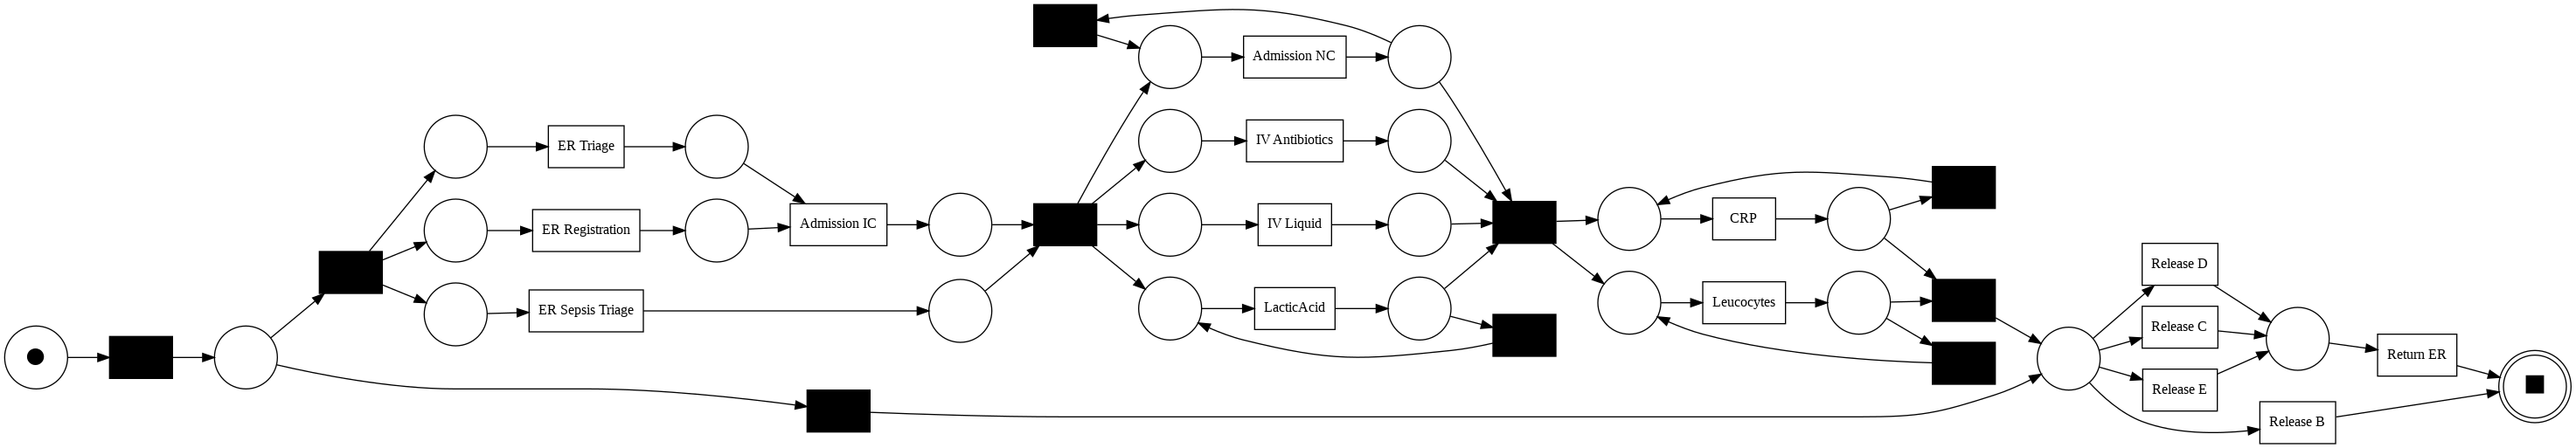

In [ ]:
# Discover the process model with Inductive Miner for "segment_removed_long_cases"

net, im, fm = pm4py.discover_petri_net_inductive(combined_segment, noise_threshold= 0.9)
pm4py.view_petri_net(net, im, fm, format='png')

In [ ]:
# Conformance checking diagnostic for "segment_removed_long_cases"

tbr_diagnostics_segment_removed_long_case = pm4py.conformance_diagnostics_token_based_replay(combined_segment , net, im, fm, return_diagnostics_dataframe = True)
tbr_diagnostics_segment_removed_long_case

replaying log with TBR, completed traces ::   0%|          | 0/666 [00:00<?, ?it/s]

,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,A,False,0.815789,7,7,38,38
1,AAA,False,0.430769,7,9,15,13
2,ABA,False,0.750000,7,7,28,28
3,AC,False,0.631579,7,7,19,19
4,AD,False,0.854449,7,8,52,51
...,...,...,...,...,...,...,...
694,ZU,False,0.386905,7,9,14,12
695,ZV,False,0.611111,7,7,18,18
696,ZW,False,0.650000,7,7,20,20
697,ZX,False,0.386905,7,9,14,12


In [ ]:
#************************************************* Filter disfunctional cases in segment_removed_long_cases ********************************************

## Get the Case_ID of the cases with low fitness values(Disfunctional traces) => Filter based on CaseID
disfunctional_traces_segment_removed_long_case = tbr_diagnostics_segment_removed_long_case['case_id'][tbr_diagnostics_segment_removed_long_case['trace_fitness'] <= 0.65].tolist()
print(len(set(disfunctional_traces_segment_removed_long_case)))
print(disfunctional_traces_segment_removed_long_case)

226
['AAA', 'AC', 'AH', 'AHA', 'ALA', 'AMA', 'AU', 'AV', 'B', 'BA', 'BAA', 'BD', 'BDA', 'BE', 'BF', 'BGA', 'BK', 'BL', 'BMA', 'BNA', 'BQ', 'BR', 'BT', 'BV', 'CE', 'CH', 'CHA', 'CJA', 'CN', 'CO', 'CQ', 'CV', 'D', 'DB', 'DBA', 'DCA', 'DEA', 'DG', 'DI', 'DK', 'DL', 'DW', 'DY', 'EBA', 'EEA', 'EGA', 'EH', 'EIA', 'EJ', 'EJA', 'ET', 'F', 'FEA', 'FG', 'FH', 'FHA', 'FJ', 'FKA', 'FMA', 'G', 'GA', 'GB', 'GBA', 'GC', 'GDA', 'GFA', 'GP', 'GQ', 'GY', 'HA', 'HDA', 'HF', 'HH', 'HJA', 'HK', 'HP', 'HQ', 'HR', 'HX', 'IAA', 'IB', 'IBA', 'IC', 'IDA', 'IEA', 'II', 'IIA', 'IL', 'ILA', 'IQ', 'J', 'JFA', 'JG', 'JGA', 'JH', 'JJ', 'JJA', 'JL', 'JN', 'JO', 'KB', 'KC', 'KCA', 'KH', 'KHA', 'KIA', 'KJ', 'KN', 'KP', 'KT', 'KV', 'KW', 'LFA', 'LHA', 'LK', 'LR', 'LU', 'MFA', 'MHA', 'MIA', 'MO', 'MR', 'MT', 'MX', 'N', 'NH', 'NHA', 'NIA', 'NKA', 'NV', 'NX', 'O', 'OG', 'OGA', 'OHA', 'OKA', 'OLA', 'OO', 'OQ', 'OS', 'PG', 'PI', 'PT', 'PW', 'QDA', 'QG', 'QI', 'QM', 'QO', 'QQ', 'QZ', 'RFA', 'RIA', 'RS', 'RT', 'SB', 'SE', 'SEA'

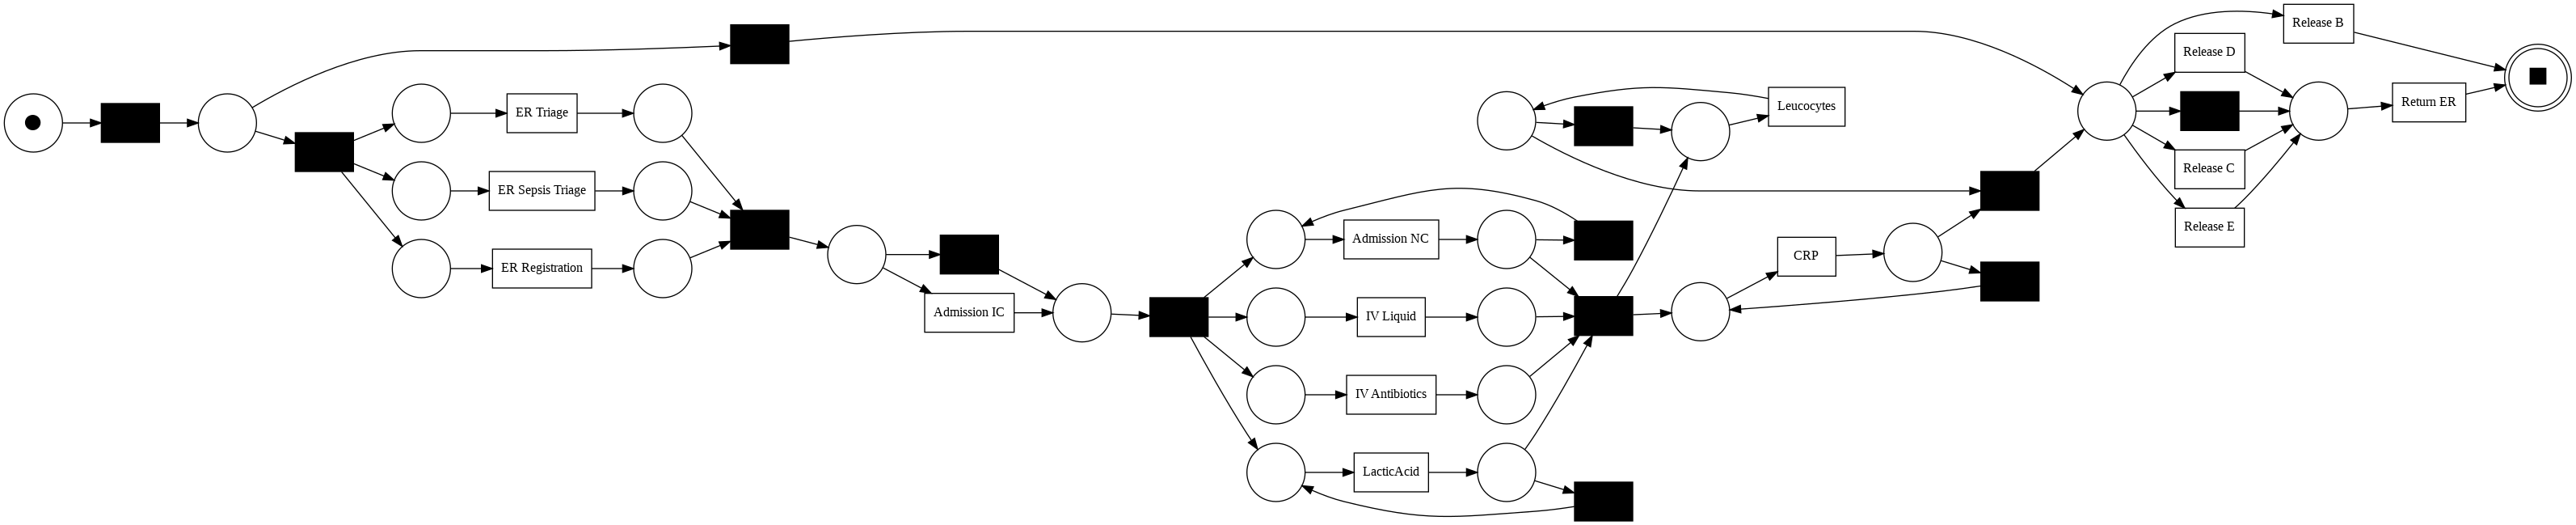

In [ ]:
# Discover the process model with Inductive Miner for "segment_long_cases"

net, im, fm = pm4py.discover_petri_net_inductive(segment_long_cases, noise_threshold= 0.9)
pm4py.view_petri_net(net, im, fm, format='png')

In [ ]:
# Conformance checking diagnostic for "segment_long_cases"

tbr_diagnostics_segment_long_case = pm4py.conformance_diagnostics_token_based_replay(segment_long_cases , net, im, fm, return_diagnostics_dataframe = True)
tbr_diagnostics_segment_long_case

replaying log with TBR, completed traces ::   0%|          | 0/200 [00:00<?, ?it/s]

,case_id,is_fit,trace_fitness,missing,remaining,produced,consumed
0,AC,False,0.925926,2,2,27,27
1,AD,False,0.923684,3,6,60,57
2,AE,False,0.878195,3,6,38,35
3,AFA,False,0.893997,2,4,29,27
4,AI,False,0.935484,2,2,31,31
...,...,...,...,...,...,...,...
202,ZHA,False,0.916608,3,6,55,52
203,ZKA,False,0.875000,4,4,32,32
204,ZL,False,0.925926,2,2,27,27
205,ZLA,False,0.865424,2,4,23,21


In [ ]:
#************************************************* Filter disfunctional cases in segment_long_cases ********************************************

## Get the Case_ID of the cases with low fitness values(Disfunctional traces) => Filter based on CaseID
disfunctional_traces_segment_long_case = tbr_diagnostics_segment_long_case['case_id'][tbr_diagnostics_segment_long_case['trace_fitness'] <= 0.65].tolist()
print(len(set(disfunctional_traces_segment_long_case)))
print(disfunctional_traces_segment_long_case)

0
[]


In [ ]:
# Filter the cases where the first administration of 'IV Antibiotics' is less than one hour

# Calculate the relative time by subtracting the process start time from the event timestamp
filtered_log['cumulativetime'] = filtered_log['time:timestamp'] - filtered_log['casestart']

# Convert relative times to more friendly measures
## seconds
filtered_log['cumulativetime_s'] = filtered_log['cumulativetime'].dt.seconds + 86400 * filtered_log['cumulativetime'].dt.days
## hours
filtered_log['cumulativetime_h'] = filtered_log['cumulativetime'].dt.seconds / 3600 + 86400 * filtered_log['cumulativetime'].dt.days
## days
filtered_log['cumulativedays'] = filtered_log['cumulativetime'].dt.days

# Filter the cases where the case:concept is 'IV Antibiotics' and the cumulative hours are less than one hour
#filtered_log_antibiotics = filtered_log[(filtered_log['concept:name'] == 'IV Antibiotics') & (filtered_log['cumulativetime_h'] < 1)]
#len(filtered_log_antibiotics['case:concept:name'].unique())

# Identify the first occurrence of 'IV Antibiotics' for each case
first_iv_antibiotics = filtered_log[filtered_log['concept:name'] == 'IV Antibiotics'].groupby('case:concept:name').first().reset_index()

# Filter the cases where the cumulative hours are less than one hour
filtered_log_antibiotics = first_iv_antibiotics[first_iv_antibiotics['cumulativetime_h'] < 1]

# Get unique case names
filtered_log_antibiotics_unique = filtered_log_antibiotics['case:concept:name'].unique()
filtered_log_antibiotics_unique

array(['AHA', 'AL', 'ALA', 'AR', 'AU', 'AV', 'BA', 'BF', 'BHA', 'BJ',
       'BK', 'BR', 'BU', 'BW', 'C', 'CC', 'CH', 'CI', 'CN', 'CO', 'CP',
       'CQ', 'CV', 'CW', 'DAA', 'DC', 'DDA', 'DGA', 'DJ', 'DK', 'DP',
       'EEA', 'EF', 'EJA', 'EKA', 'ELA', 'EMA', 'EO', 'ES', 'EU', 'EX',
       'FCA', 'FG', 'FK', 'FM', 'FN', 'FO', 'FW', 'G', 'GA', 'GB', 'GC',
       'GE', 'GJ', 'GJA', 'GLA', 'GM', 'GV', 'GX', 'GY', 'HDA', 'HF',
       'HIA', 'HR', 'HV', 'I', 'IB', 'IBA', 'IEA', 'IIA', 'IL', 'IS',
       'IU', 'IY', 'JA', 'JC', 'JE', 'JH', 'JK', 'JMA', 'JN', 'JU', 'JV',
       'JX', 'KA', 'KB', 'KC', 'KD', 'KE', 'KH', 'KHA', 'KI', 'KIA', 'KK',
       'KS', 'LBA', 'LDA', 'LE', 'LHA', 'LL', 'LN', 'LS', 'LZ', 'MBA',
       'ME', 'MEA', 'MFA', 'MGA', 'MIA', 'MKA', 'ML', 'MP', 'MR', 'MU',
       'MV', 'MW', 'NA', 'NDA', 'NEA', 'NMA', 'NN', 'NR', 'NT', 'NV', 'O',
       'OC', 'ODA', 'OHA', 'OMA', 'ON', 'OQ', 'OU', 'OX', 'PBA', 'PFA',
       'PG', 'PGA', 'PT', 'PU', 'PZ', 'QBA', 'QHA', 'QIA', 'QJ',

In [ ]:
# segment_CRP100_on3rd_day: CRP more than 100 MG/L on 3rd day
crp_df = filtered_log[filtered_log['concept:name'] == 'CRP']

# Convert 'time:timestamp' to datetime if it's not already
crp_df['time:timestamp'] = pd.to_datetime(crp_df['time:timestamp'])

# Sort the DataFrame by case and timestamp
crp_df = crp_df.sort_values(by=['case:concept:name', 'time:timestamp'])

# Add a column to indicate the day number of each CRP measurement per case
crp_df['day'] = crp_df.groupby('case:concept:name').cumcount() + 1

# Filter for 3rd day measurements
day_3_crp_df = crp_df[crp_df['day'] == 3]

# Filter for cases where the 3rd day CRP value is greater than 100 mg/L
high_crp_cases = day_3_crp_df[day_3_crp_df['CRP'] > 100]['case:concept:name'].unique()

# Create the segment of the cases where the 3rd day CRP value is greater than 100 mg/L
segment_CRP100_on3rd_day = filtered_log[filtered_log['case:concept:name'].isin(high_crp_cases)]

# Print the number of unique cases in this segment
print('Total unique cases with 3rd day CRP > 100 mg/L: ', len(segment_CRP100_on3rd_day['case:concept:name'].unique()))

# If needed, print the segment DataFrame
segment_CRP100_on3rd_day['case:concept:name'].unique()

Total unique cases with 3rd day CRP > 100 mg/L:  216


/usr/local/lib/python3.10/dist-packages/cudf/pandas/fast_slow_proxy.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)


array(['ABA', 'AD', 'AFA', 'AGA', 'AJ', 'AS', 'BCA', 'BH', 'BJ', 'BKA',
       'BP', 'BV', 'BW', 'BX', 'CBA', 'CEA', 'CF', 'CKA', 'CX', 'DDA',
       'DGA', 'DJ', 'DP', 'DZ', 'EAA', 'EBA', 'EC', 'ECA', 'EHA', 'EI',
       'EK', 'EM', 'EMA', 'EQ', 'EW', 'FE', 'FJA', 'FN', 'FO', 'FT', 'FW',
       'FY', 'GAA', 'GD', 'GF', 'GJ', 'GJA', 'GL', 'GLA', 'GN', 'GO',
       'GT', 'HAA', 'HB', 'HD', 'HE', 'HGA', 'HJ', 'HL', 'HNA', 'HO',
       'HS', 'HZ', 'IHA', 'IM', 'IS', 'IU', 'JCA', 'JK', 'JLA', 'JQ',
       'JR', 'JS', 'JU', 'JX', 'JY', 'KD', 'KM', 'KMA', 'KO', 'KS', 'KX',
       'KZ', 'LBA', 'LG', 'LH', 'LIA', 'LJ', 'LL', 'LM', 'LP', 'LQ', 'LT',
       'LV', 'LZ', 'MAA', 'MEA', 'MJ', 'MK', 'MKA', 'MM', 'MQ', 'MV',
       'MW', 'NA', 'NB', 'NEA', 'NF', 'NGA', 'NK', 'NMA', 'NR', 'NT',
       'NZ', 'OAA', 'OB', 'OC', 'OD', 'OHA', 'OIA', 'OK', 'OMA', 'OQ',
       'OR', 'OY', 'PB', 'PFA', 'PGA', 'PIA', 'PJ', 'PK', 'PLA', 'PU',
       'QA', 'QAA', 'QBA', 'QC', 'QCA', 'QE', 'QF', 'QH', 'QMA', 'QU'

In [ ]:
# Creating high_Risk segments

# CRP more than 50 MG/L:
# Leucocytes (WBC) less than 4000/μl or more than 12000/μl:
# LacticAcid more than 2.0 MG/L:

print('Filtred log: ',len(filtered_log['case:concept:name'].unique()))

# segmentCRP50: CRP more than 50 MG/L
CasesCRPRisk = filtered_log[filtered_log['CRP'] >= 50]['case:concept:name'].unique()  #filters the filtered_log DataFrame to include only the rows where [CRP>=50]. It then selects the case:concept:name column from these filtered rows and extracts the unique values. => The result is an array (CasesCRPRisk) of unique case names that have CRP levels of 50 or higher.
segmentCRP50 = filtered_log[filtered_log['case:concept:name'].isin(CasesCRPRisk)]     #filters the filtered_log DataFrame again, to includes only the rows where the case:concept:name column contains any of the values found in the CasesCRPRisk array. => The result is a new DataFrame (segmentCRP50) that includes all rows from the original filtered_log where the case name has a CRP level of 50 or higher.
print('\nCRP more than 50 MG/L: ',len(segmentCRP50['case:concept:name'].unique()))

# segmentLeuRsik: Leucocytes less than 4000/μl or more than 12000/μl.
condition = (filtered_log['Leucocytes'] < 4) | (filtered_log['Leucocytes'] >= 12)
CasesLeuRisk = filtered_log[condition]['case:concept:name'].unique()
segmentLeuRsik = filtered_log[filtered_log['case:concept:name'].isin(CasesLeuRisk)]
print('Leucocytes less than 4,000/μl or more than 12,000/μl: ',len(segmentLeuRsik['case:concept:name'].unique()))

#	segmentLactRisk: LacticAcid levels > 2.0 MGL
CasesLactRisk = filtered_log[filtered_log['LacticAcid'] >= 2]['case:concept:name'].unique()
segmentLactRisk = filtered_log[filtered_log['case:concept:name'].isin(CasesLactRisk)]
print('LacticAcid more than 2.0 MG/L: ',len(segmentLactRisk['case:concept:name'].unique()))


# Create a union of all cases
all_cases = set(CasesCRPRisk).union(set(CasesLeuRisk), set(CasesLactRisk))

# Filter the original log to include only the cases in the combined segment
combined_segment = filtered_log[filtered_log['case:concept:name'].isin(all_cases)]

print('Total unique cases in the combined segment: ', len(combined_segment['case:concept:name'].unique()))

# If needed, print the combined_segment DataFrame
# combined_segment

Filtred log:  743

CRP more than 50 MG/L:  623
Leucocytes less than 4,000/μl or more than 12,000/μl:  512
LacticAcid more than 2.0 MG/L:  268
Total unique cases in the combined segment:  699


In [ ]:
# Compute mean, median, mode, and standard deviation
combined_segment.columns

Index(['InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'concept:name', 'Age', 'DiagnosticIC',
       'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'time:timestamp', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos',
       'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose',
       'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG',
       'case:concept:name', 'Leucocytes', 'CRP', 'LacticAcid', 'caseend',
       'casestart', 'cumulativetime', 'cumulativetime_s', 'cumulativetime_h',
       'cumulativedays', 'start_timestamp'],
      dtype='object')

In [ ]:
start_activities = pm4py.get_start_activities(filtered_log)
end_activities = pm4py.get_end_activities(filtered_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'ER Registration': 734, 'ER Sepsis Triage': 5, 'ER Triage': 4}
End activities: {'Release A': 377, 'Return ER': 282, 'Release B': 50, 'Release E': 5, 'Release C': 16, 'Release D': 13}


In [ ]:
start_activities = pm4py.get_start_activities(segmentLactRisk)
end_activities = pm4py.get_end_activities(segmentLactRisk)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'ER Registration': 263, 'ER Sepsis Triage': 3, 'ER Triage': 2}
End activities: {'Release A': 125, 'Return ER': 109, 'Release B': 25, 'Release E': 1, 'Release C': 3, 'Release D': 5}


In [ ]:
# **********Evaluting the significance of the correlation of two variables in a segment

var1 = len(segmentLactRisk['case:concept:name'].unique()) / len(filtered_log['case:concept:name'].unique()) #268/743 ~ HighRiskLacticAcid_cases/All_Cases
var2 = 282/len(filtered_log['case:concept:name'].unique())  #282/743 ~ ReturnER_cases/All_Cases

liftvalue = (109/len(segmentLactRisk['case:concept:name'].unique()))/(var1 * var2)  #(109/268)/(var1*var2)

print(liftvalue)  #As the result is 2.97 => the frequesnce in the segment is 3 times more than what is observed in the eventLog. it means that the presence of the condition increases the likelihood of the outcome by a factor of 3.

2.9708821820557425


In [ ]:
#long_cases

start_activities = pm4py.get_start_activities(segment_long_cases)
end_activities = pm4py.get_end_activities(segment_long_cases)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'ER Registration': 201, 'ER Triage': 3, 'ER Sepsis Triage': 3}
End activities: {'Return ER': 195, 'Release E': 2, 'Release A': 5, 'Release D': 1, 'Release C': 2, 'Release B': 2}


In [ ]:
# Retrieve the variants of the conformant event logs, creates a DataFrame from the variants dictionary
variants = pm4py.get_variants(combined_segment)

variants_df = pd.DataFrame.from_dict(variants, orient='index', columns=['Count'])
variants_df = variants_df.reset_index()

variants_df = variants_df.rename(columns={'index': 'Variant'})
variants_df = variants_df.sort_values(by=['Count'], ascending=False)
variants_df = variants_df.reset_index(drop=True)

variants_df

,Variant,Count
0,"(ER Registration, ER Triage, ER Sepsis Triage,...",4
1,"(ER Registration, ER Triage, ER Sepsis Triage,...",3
2,"(ER Registration, ER Triage, ER Sepsis Triage,...",3
3,"(ER Registration, ER Triage, ER Sepsis Triage,...",3
4,"(ER Registration, ER Triage, ER Sepsis Triage,...",3
...,...,...
661,"(ER Registration, ER Triage, ER Sepsis Triage,...",1
662,"(ER Registration, ER Triage, Leucocytes, Lacti...",1
663,"(ER Registration, ER Triage, ER Sepsis Triage,...",1
664,"(ER Registration, ER Triage, ER Sepsis Triage,...",1


================================================================================================================================================================================================================================================

In [ ]:
# Conformance checking diagnostic => get transition with problems
#tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log_csv, net, im, fm, return_diagnostics_dataframe=False)
#diagnostics_df = pd.DataFrame.from_dict(tbr_diagnostics)
#diagnostics_df
#----------------------------------------------------------------------

#************************************************* Filter disfunctional cases********************************************

## Get the Case_ID of the cases with low fitness values(Disfunctional traces) => Filter based on CaseID
disfuntional_traces = tbr_diagnostics['case_id'][tbr_diagnostics['trace_fitness'] <= 0.65].tolist()
print(disfuntional_traces)
disfuntional_traces

## Apply a filter to remove the list of disfunctional cases based on CaseID ('case:concept:name')=> retain=false means we want to filter out our dataframe from the disfunctional_traces. =>> if set to true=> our dataframe will include the disfunctional_traces
filtered_dataframe = pm4py.filter_event_attribute_values(filtered_log, 'case:concept:name', disfuntional_traces, retain=False)

['AAA', 'AC', 'AH', 'AHA', 'ALA', 'AMA', 'ANA', 'AO', 'AU', 'AV', 'B', 'BA', 'BAA', 'BD', 'BDA', 'BE', 'BF', 'BGA', 'BK', 'BL', 'BMA', 'BNA', 'BQ', 'BR', 'BT', 'BV', 'CE', 'CH', 'CHA', 'CI', 'CJA', 'CN', 'CO', 'CQ', 'CT', 'CU', 'CV', 'D', 'DB', 'DBA', 'DC', 'DCA', 'DEA', 'DG', 'DI', 'DJA', 'DK', 'DL', 'DT', 'DW', 'DY', 'EBA', 'EDA', 'EE', 'EEA', 'EGA', 'EH', 'EIA', 'EJ', 'EJA', 'ET', 'F', 'FC', 'FEA', 'FG', 'FH', 'FHA', 'FJ', 'FKA', 'FMA', 'G', 'GA', 'GB', 'GBA', 'GC', 'GDA', 'GFA', 'GP', 'GQ', 'GY', 'HA', 'HDA', 'HF', 'HH', 'HI', 'HJA', 'HK', 'HP', 'HQ', 'HR', 'HX', 'I', 'IAA', 'IB', 'IBA', 'IC', 'IDA', 'IE', 'IEA', 'II', 'IIA', 'IL', 'ILA', 'IQ', 'IZ', 'J', 'JFA', 'JG', 'JGA', 'JH', 'JHA', 'JJ', 'JJA', 'JL', 'JN', 'JO', 'KAA', 'KB', 'KC', 'KCA', 'KH', 'KHA', 'KIA', 'KJ', 'KN', 'KP', 'KT', 'KV', 'KW', 'LFA', 'LHA', 'LK', 'LMA', 'LR', 'LU', 'MBA', 'MFA', 'MHA', 'MIA', 'MO', 'MR', 'MT', 'MX', 'N', 'NH', 'NHA', 'NIA', 'NKA', 'NO', 'NV', 'NX', 'O', 'OG', 'OGA', 'OHA', 'OKA', 'OLA', 'OO', 

{('Admission IC', 'Admission IC'): 1, ('Admission IC', 'Admission NC'): 4, ('Admission IC', 'CRP'): 32, ('Admission IC', 'ER Sepsis Triage'): 1, ('Admission IC', 'LacticAcid'): 36, ('Admission IC', 'Leucocytes'): 30, ('Admission NC', 'Admission IC'): 18, ('Admission NC', 'Admission NC'): 168, ('Admission NC', 'CRP'): 346, ('Admission NC', 'ER Sepsis Triage'): 5, ('Admission NC', 'ER Triage'): 1, ('Admission NC', 'IV Antibiotics'): 2, ('Admission NC', 'IV Liquid'): 18, ('Admission NC', 'LacticAcid'): 27, ('Admission NC', 'Leucocytes'): 381, ('Admission NC', 'Release A'): 113, ('Admission NC', 'Release B'): 15, ('Admission NC', 'Release C'): 4, ('Admission NC', 'Release D'): 1, ('CRP', 'Admission IC'): 15, ('CRP', 'Admission NC'): 177, ('CRP', 'CRP'): 291, ('CRP', 'ER Sepsis Triage'): 24, ('CRP', 'ER Triage'): 7, ('CRP', 'IV Antibiotics'): 61, ('CRP', 'IV Liquid'): 90, ('CRP', 'LacticAcid'): 525, ('CRP', 'Leucocytes'): 1256, ('CRP', 'Release A'): 309, ('CRP', 'Release B'): 18, ('CRP', 'R

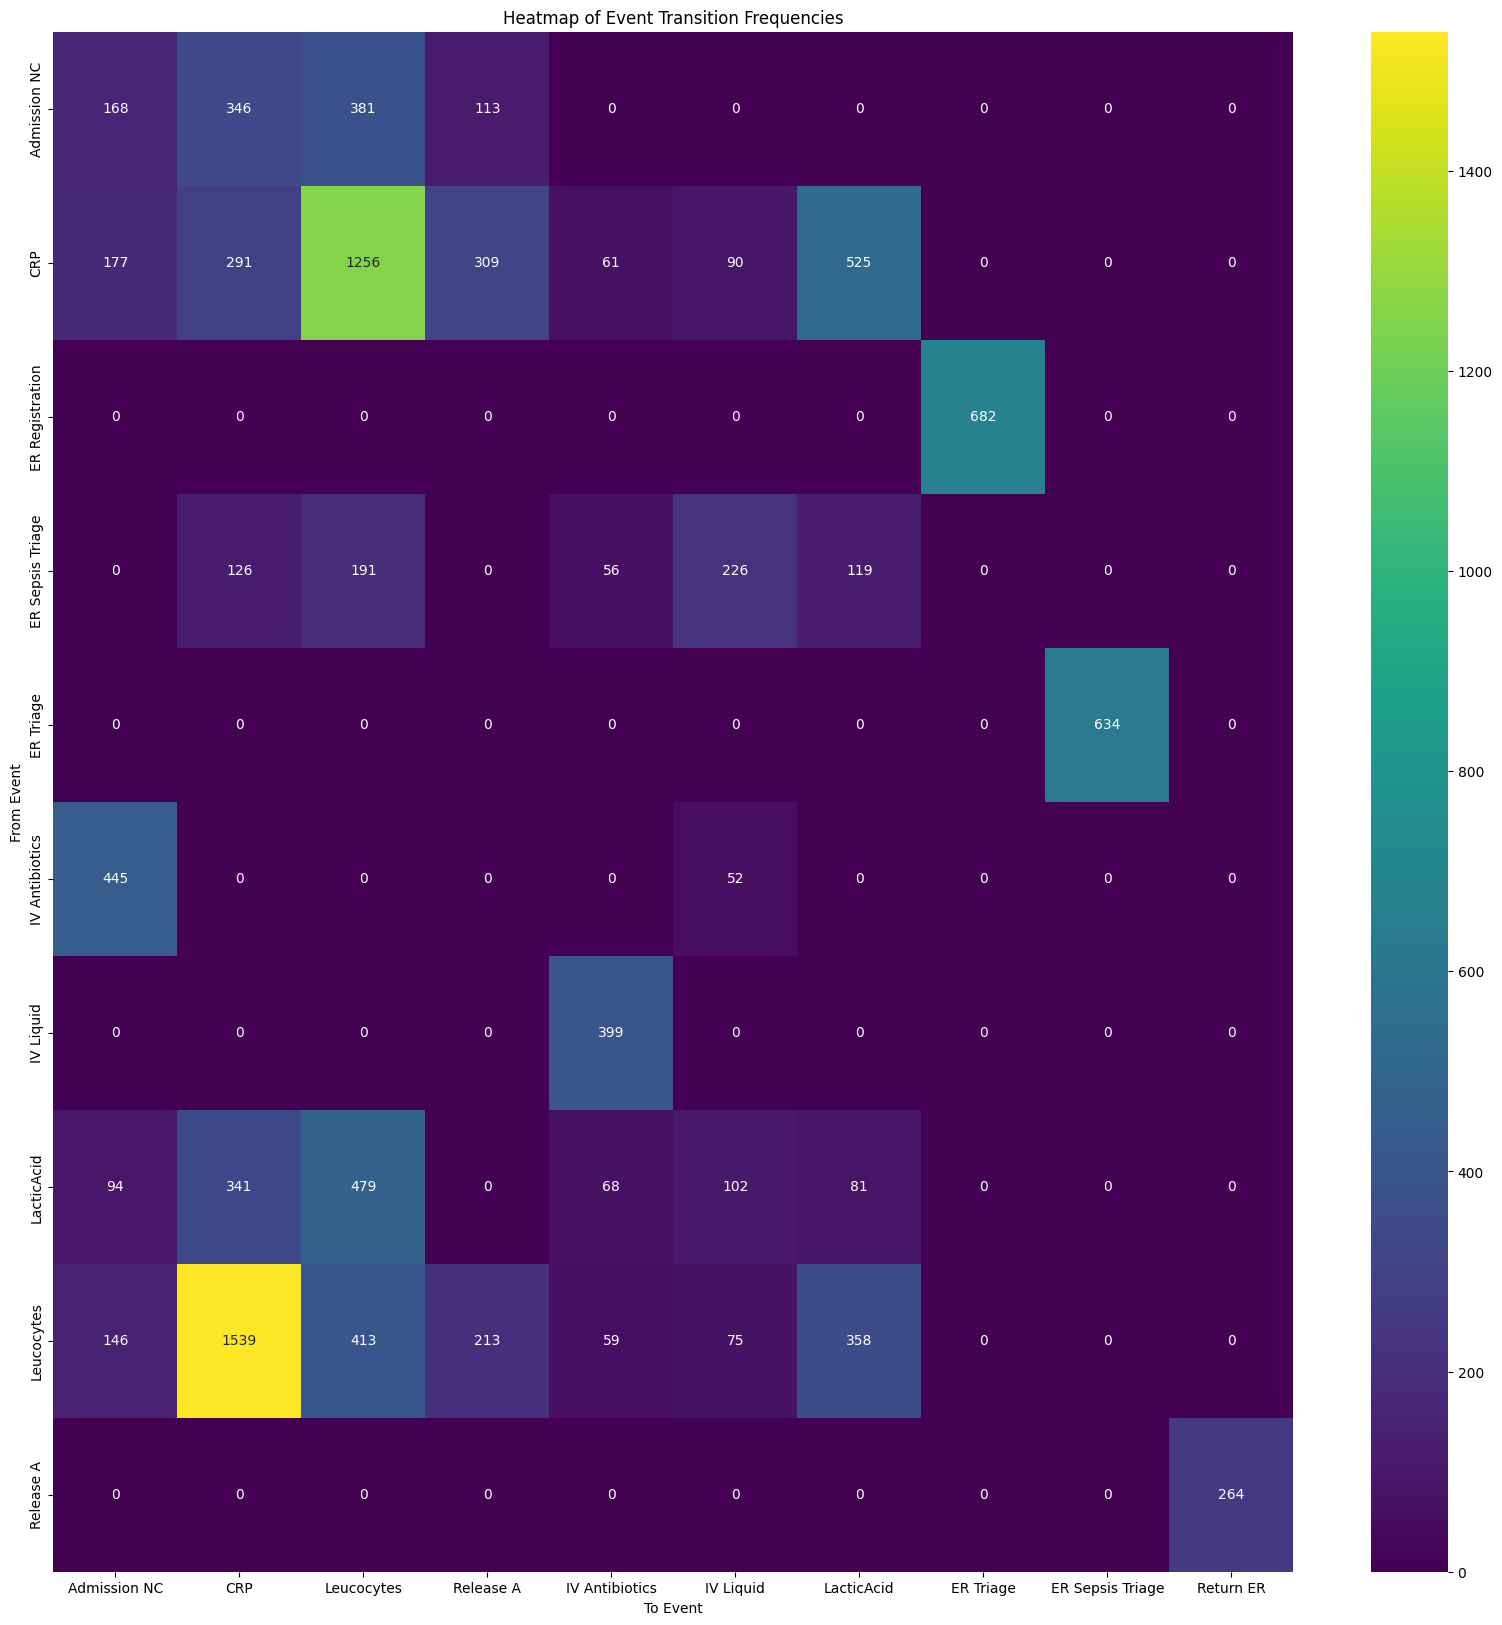

In [ ]:
# Extract the DFG
dfg, start_activities, end_activities = pm4py.discover_dfg(filtered_log)
print(dfg)

# Set a threshold
threshold = 50

# Filter the dictionary to only include items with values above the threshold
filtered_dfg = {key: value for key, value in dfg.items() if value > threshold}

# Initialize an empty dictionary to be converted to DataFrame
transition_matrix = {}
for (from_event, to_event), frequency in filtered_dfg.items():
    if from_event not in transition_matrix:
        transition_matrix[from_event] = {}
    transition_matrix[from_event][to_event] = frequency

# Create DataFrame
df_matrix = pd.DataFrame(transition_matrix).fillna(0).astype(int).T  # Transpose for correct orientation

# Display the resulting matrix
#print(df_matrix)

# Create a mask for values below the threshold
mask = df_matrix < 0

# Generate the heatmap
plt.figure(figsize=(20, 20))  # Size may need adjustment based on the actual size of the matrix
sns.heatmap(df_matrix, mask=mask, annot=True, fmt="d", cmap="viridis")
plt.title('Heatmap of Event Transition Frequencies')
plt.xlabel('To Event')
plt.ylabel('From Event')
plt.show()

In [ ]:
# Conformance checking diagnostic based on _diagnostics_alignments => we use the model which is provided base on the filtered log (the last model which is run is generated based on the filtered log)

#if same as replay we onle use this command with true => the information is not complete (We dont know why-PM4PY issue)
#=>
#1. we generate the result as dictionary (return_diagnostics_dataframe=False)
#2. convert the dictionary to Dataframe
#3. merge the two Dtaframeto get the new DataFrame with all the information with CASE-ID


## Using Aligments DF provides case_id but less attributes
al_diagnostics = pm4py.conformance_diagnostics_alignments(eventlog_df, net, im, fm, return_diagnostics_dataframe=True)    #=>provide DataFrame with CaseID but with less information
al_diagnostics

## Let's create another DataFrame from the dictioanry
al_diagnostics_dic = pm4py.conformance_diagnostics_alignments(eventlog_df, net, im, fm)   #=>provide Dictionary without CaseID but with complete information (Same as return_diagnostics_dataframe = False )
diagnostics_ex = pd.DataFrame.from_dict(al_diagnostics_dic)                           #Convert the Dictionary to DataFrame

## Let's merge the two DataFrames
merged_df = pd.merge(al_diagnostics, diagnostics_ex, left_index=True, right_index=True)

# Alternatively, you can use the join() function
# merged_df = df1.join(df2)

merged_df


#in alignment column we can see clearly the dysfunctional part of traces => to find the reason of non conformant behavior, its better to use alignment

aligning log, completed variants ::   0%|          | 0/846 [00:00<?, ?it/s]

aligning log, completed variants ::   0%|          | 0/846 [00:00<?, ?it/s]

,case_id,cost_x,fitness_x,is_fit,alignment,cost_y,visited_states,queued_states,traversed_arcs,lp_solved,fitness_y,bwc
0,A,60017,0.739130,False,"[(>>, None), (>>, None), (ER Registration, ER ...",60017,58,183,203,86,0.739130,230002
1,AA,60007,0.333333,False,"[(>>, None), (>>, None), (ER Registration, ER ...",60007,80,224,289,146,0.333333,90002
2,AAA,50008,0.583333,False,"[(>>, None), (>>, None), (ER Registration, ER ...",50008,69,207,260,136,0.583333,120002
3,AB,60007,0.333333,False,"[(>>, None), (>>, None), (ER Registration, ER ...",60007,106,279,376,190,0.333333,90002
4,ABA,40012,0.777778,False,"[(>>, None), (>>, None), (ER Registration, ER ...",40012,36,129,143,64,0.777778,180002
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,ZV,40007,0.692308,False,"[(>>, None), (>>, None), (ER Registration, ER ...",40007,24,95,100,66,0.692308,130002
1046,ZW,40008,0.714286,False,"[(>>, None), (>>, None), (ER Registration, ER ...",40008,27,100,107,65,0.714286,140002
1047,ZX,60007,0.454545,False,"[(>>, None), (>>, None), (ER Registration, ER ...",60007,68,209,259,140,0.454545,110002
1048,ZY,60007,0.333333,False,"[(>>, None), (>>, None), (ER Registration, ER ...",60007,79,218,280,138,0.333333,90002


In [ ]:
# Creating segments (Using PM4PY): To filter the eventLog based on specific values >> at Case level (not event)
# => Method: pm4py.filtering.filter_trace_attribute_values >> but this method can only filter string values >> For Integer values >> first we create a segment from values we want, then apply the method.
#CRP>50:

print('Filtred log: ',len(filtered_log['case:concept:name'].unique()))

# Generate allowed numbers
min_val = 50
max_val = filtered_log['CRP'].max()
step_size = 1

array = np.arange(min_val, max_val + 1, step_size) # => these are all the values which are valid in our point of view.

# This method accepts only a list of values
segmentCRP50a = pm4py.filter_trace_attribute_values(filtered_log, 'CRP', array, case_id_key='case:concept:name')
print('CRP more than 50: ',len(segmentCRP50a['case:concept:name'].unique()))

Filtred log:  743
CRP more than 50:  623


In [ ]:
# Creating segments (Using Pandas) for high risk patients:

print('Filtred log: ',len(filtered_log['case:concept:name'].unique()))

# segmentCRP50: CRP more than100 MG/L
CasesCRPRisk = filtered_log[filtered_log['CRP'] >= 100]['case:concept:name'].unique()
segmentCRP100 = filtered_log[filtered_log['case:concept:name'].isin(CasesCRPRisk)]
print('\nCRP more than 100 MG/L: ',len(segmentCRP100['case:concept:name'].unique()))

# Calculate the 3rd day after registration for each case
segmentCRP100['patient_registration'] = filtered_log.groupby('case:concept:name')['time:timestamp'].transform('min')
segmentCRP100['third_day'] = filtered_log['casestart'] + pd.Timedelta(days=3)
segmentCRP100

CasesLeuRisk = segmentCRP100[condition]['case:concept:name']
segmentLeuRsik = segmentCRP100[segmentCRP100['case:concept:name'].isin(CasesLeuRisk)]
print('CRP>100 on third day: ',len(segmentLeuRsik['case:concept:name'].unique()))
segmentLeuRsik['case:concept:name'].unique()


Filtred log:  743

CRP more than 100 MG/L:  478
CRP>100 on third day:  361


/usr/local/lib/python3.10/dist-packages/cudf/pandas/fast_slow_proxy.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cudf/pandas/fast_slow_proxy.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cudf/pandas/fast_slow_proxy.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return fn(*args, **kwargs)


array(['A', 'ABA', 'AD', 'AFA', 'AGA', 'AI', 'AJ', 'AL', 'AQ', 'AR', 'AS',
       'B', 'BCA', 'BD', 'BGA', 'BH', 'BJ', 'BJA', 'BKA', 'BL', 'BLA',
       'BN', 'BP', 'BQ', 'BW', 'BX', 'C', 'CB', 'CE', 'CEA', 'CF', 'CG',
       'CHA', 'CKA', 'CNA', 'CR', 'CV', 'CW', 'CX', 'CY', 'DA', 'DAA',
       'DCA', 'DDA', 'DG', 'DGA', 'DH', 'DJ', 'DO', 'DP', 'DY', 'DZ',
       'EA', 'EBA', 'EC', 'ECA', 'ED', 'EF', 'EHA', 'EI', 'EIA', 'EK',
       'EM', 'EQ', 'ES', 'EU', 'EW', 'EX', 'FCA', 'FG', 'FH', 'FJA', 'FK',
       'FN', 'FO', 'FT', 'FW', 'FZ', 'G', 'GD', 'GEA', 'GF', 'GHA', 'GJ',
       'GJA', 'GL', 'GM', 'GN', 'GO', 'GT', 'GY', 'HAA', 'HB', 'HD', 'HE',
       'HF', 'HGA', 'HH', 'HHA', 'HIA', 'HJ', 'HK', 'HL', 'HLA', 'HN',
       'HNA', 'HO', 'HQ', 'HS', 'HX', 'HZ', 'IB', 'IDA', 'IEA', 'IH',
       'IHA', 'II', 'IIA', 'IJ', 'IM', 'IO', 'IS', 'IT', 'IU', 'JC',
       'JCA', 'JK', 'JKA', 'JL', 'JLA', 'JM', 'JMA', 'JN', 'JQ', 'JR',
       'JV', 'JW', 'KA', 'KC', 'KD', 'KF', 'KH', 'KHA', 'KJ', 'K

In [ ]:
# Conformance checking diagnostic
## Using Aligments DF provides case_id but less attributes
al_diagnostics = pm4py.conformance_diagnostics_alignments(segmentCRP50, net, im, fm, return_diagnostics_dataframe=True)

al_diagnostics
## Let's create another DF from the dictioanry
al_diagnostics_dic = pm4py.conformance_diagnostics_alignments(segmentCRP50, net, im, fm)
diagnostics_ex = pd.DataFrame.from_dict(al_diagnostics_dic)

## Let's merge the two DFs
merged_df = pd.merge(al_diagnostics, diagnostics_ex, left_index=True, right_index=True)
# Alternatively, you can use the join() function
# merged_df = df1.join(df2)

merged_df

aligning log, completed variants ::   0%|          | 0/597 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Create a table (CrossTable) giving the number of cases in which each event is present
events_share = pd.crosstab(filtered_log['case:concept:name'], filtered_log['concept:name']) # create a table with CaseID and Activity
filtered_log_per_case = pd.DataFrame(events_share)

# Compute the sum of each column and each row in the events_share DataFrame
column_sums = filtered_log_per_case.sum(axis=0)
row_sums = filtered_log_per_case.sum(axis=1)

# Add the sums as a new row and column respectively in the DataFrame
filtered_log_per_case.loc['Total', :] = column_sums
filtered_log_per_case['Total_events_per_case'] = row_sums

# Sort the DataFrame based on the 'Total_events_per_case' column
filtered_log_per_case_sorted = filtered_log_per_case.sort_values(by='Total_events_per_case', axis=0, ascending=False)

filtered_log_per_case_sorted